In [92]:
# read the text file and store the data in a list

def read_file(file_name):
    with open(file_name) as f:
        lines = f.readlines()
    return lines

path = './book_text'

text = read_file(path)

# remove all the \n in the text
text = [x.strip() for x in text]

# merge the blocks of strings separated by ''
blocks = []
b = ''
for i in range(len(text)):
    if text[i] == '':
        blocks.append(b)
        b = ''
    else:
        b += ' '+text[i]
# blocks



[' PART ONE',
 '',
 '',
 '',
 ' CHAPTER I A SHIFTING REEF',
 '',
 ' The year 1866 was signalised by a remarkable incident, a mysterious and puzzling phenomenon, which doubtless no one has yet forgotten. Not to mention rumours which agitated the maritime population and excited the public mind, even in the interior of continents, seafaring men were particularly excited. Merchants, common sailors, captains of vessels, skippers, both of Europe and America, naval officers of all countries, and the Governments of several states on the two continents, were deeply interested in the matter.',
 ' For some time past, vessels had been met by “an enormous thing,” a long object, spindle-shaped, occasionally phosphorescent, and infinitely larger and more rapid in its movements than a whale.',
 ' The facts relating to this apparition (entered in various log-books) agreed in most respects as to the shape of the object or creature in question, the untiring rapidity of its movements, its surprising power

In [98]:

import tqdm, sys, re
# handling the geolocalisation coordinates by replacing lat. long. N. S. E. W. by lat long N S E W, except if the following word is a capitalised word that is NOT one of N S E W
for b in tqdm.tqdm(blocks):
    # b = 'in 42° 15′ N. lat. and 60° 35′ W. long. She'
    # b ='15° 12′ long. and 45° 37′ lat. She'
    b = b.split(" ")
    # print(b)
    for i in range(len(b)):
        # remove the non-alphabetical characters
        token = re.sub(r'[^a-zA-Z]', '', b[i])

        if token == 'lat' or token == 'long' or token == 'N' or token == 'S' or token == 'E' or token == 'W':
            remove = True
            # find the next word
            j = i+1;
            # print(token)
            while j < len(b):
                n = b[j]
                # remove the non-alphabetical characters
                n = re.sub(r'[^a-zA-Z]', '', n)
                # print(n)
                if len(n) == 0:
                    j += 1
                    # print('case 1', j)
                elif len(n) ==1 and n.isupper():
                    remove = True;
                    # print('case 2', j)
                    break;
                elif n.istitle():
                    # this is the start of a new sentence
                    # print('case 3', j, n)
                    remove = False;
                    break;
                else:
                    # print('case 4', j)
                    remove = True;
                    break;
            
            if remove:
                b[i] = b[i].replace('.','')
            
                # print('remove',b[i])

# remove Abbreviations point like Mr. , Mrs. , Dr. , M. , St. , 
for b in tqdm.tqdm(blocks):
    for i in range(len(b)):
        # remove the non-alphabetical characters
        token = re.sub(r'[^a-zA-Z]', '', b[i])
        if token == 'Mr' or token == 'Mrs' or token == 'Dr' or token == 'M' or token == 'St':
            try:      b[i] = b[i].replace('.','')
            except:   pass
            # print('remove',b[i])

import re
# in all the blocks, find the different sentences
sentences = []
for block in blocks:
        # split by '.' or  '!' or '?' or '...' or '!!' or '??' or '!!!' or '???'
        sentences += re.split(r'(?<=[.!?…])(?<!\d\.)\s', block)

# remove all the empty sentences
# sentences = [x for x in sentences if x != '']
for i in sentences:
    print(i)


100%|██████████| 2572/2572 [00:00<00:00, 6006.44it/s]

 PART ONE



 CHAPTER I A SHIFTING REEF

 The year 1866 was signalised by a remarkable incident, a mysterious and puzzling phenomenon, which doubtless no one has yet forgotten.
Not to mention rumours which agitated the maritime population and excited the public mind, even in the interior of continents, seafaring men were particularly excited.
Merchants, common sailors, captains of vessels, skippers, both of Europe and America, naval officers of all countries, and the Governments of several states on the two continents, were deeply interested in the matter.
 For some time past, vessels had been met by “an enormous thing,” a long object, spindle-shaped, occasionally phosphorescent, and infinitely larger and more rapid in its movements than a whale.
 The facts relating to this apparition (entered in various log-books) agreed in most respects as to the shape of the object or creature in question, the untiring rapidity of its movements, its surprising power of locomotion, and the peculiar l

In [99]:
# text extraction: using BERT to extract all the tokens in the text

from transformers import BertTokenizer, BertModel
# https://huggingface.co/transformers/v4.8.2/model_doc/bert.html?highlight=berttokenizer#berttokenizer

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')


# Tokenized sentences
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
tokenized_texts

# observation: the punctuations are not removed
# words are split into semantic units, eg: 'ph', '##os', '##ph', '##ores', '##cent',
# possessive case is split into two tokens: 'queen', "'", 's'
# tokens are capitalized

[['PA', '##RT', 'ONE'],
 [],
 [],
 [],
 ['CHAPTER', 'I', 'A', 'SH', '##IF', '##TI', '##NG', 'R', '##EE', '##F'],
 [],
 ['The',
  'year',
  '1866',
  'was',
  'signal',
  '##ised',
  'by',
  'a',
  'remarkable',
  'incident',
  ',',
  'a',
  'mysterious',
  'and',
  'pu',
  '##zzling',
  'phenomenon',
  ',',
  'which',
  'doubt',
  '##less',
  'no',
  'one',
  'has',
  'yet',
  'forgotten',
  '.'],
 ['Not',
  'to',
  'mention',
  'rumours',
  'which',
  'agitated',
  'the',
  'maritime',
  'population',
  'and',
  'excited',
  'the',
  'public',
  'mind',
  ',',
  'even',
  'in',
  'the',
  'interior',
  'of',
  'continents',
  ',',
  'sea',
  '##fari',
  '##ng',
  'men',
  'were',
  'particularly',
  'excited',
  '.'],
 ['Merchant',
  '##s',
  ',',
  'common',
  'sailors',
  ',',
  'captains',
  'of',
  'vessels',
  ',',
  'skip',
  '##pers',
  ',',
  'both',
  'of',
  'Europe',
  'and',
  'America',
  ',',
  'naval',
  'officers',
  'of',
  'all',
  'countries',
  ',',
  'and',
  'the

In [23]:
# propressing of the tokens

# should we remove the punctuations?
# should we remove the possessive case?
# should we remove the capitalized tokens?


In [101]:
# Basic entity extraction: Will determine PERSONS, PLACES, and other entities through creating a knowledge graph

# https://spacy.io/usage/linguistic-features#named-entities
# https://spacy.io/usage/visualizers#ent

import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
# merge the sentences into a single string
text = ' '.join(sentences)
doc = nlp(text)

# extract the entities
entities = [(X.text, X.label_) for X in doc.ents]
entities



[('The year 1866', 'DATE'),
 ('Europe', 'LOC'),
 ('America', 'GPE'),
 ('two', 'CARDINAL'),
 ('two hundred feet', 'QUANTITY'),
 ('a mile', 'QUANTITY'),
 ('three', 'CARDINAL'),
 ('the day', 'DATE'),
 ('the 20th of July, 1866', 'DATE'),
 ('Higginson', 'PERSON'),
 ('five miles', 'QUANTITY'),
 ('the east coast', 'LOC'),
 ('Australia', 'GPE'),
 ('Baker', 'PERSON'),
 ('first', 'ORDINAL'),
 ('two', 'CARDINAL'),
 ('a hundred and fifty feet', 'CARDINAL'),
 ('Higginson', 'PERSON'),
 ('the 23rd of July', 'DATE'),
 ('the same year', 'DATE'),
 ('the Pacific Ocean', 'LOC'),
 ('Columbus', 'NORP'),
 ('West India', 'GPE'),
 ('Pacific Steam Navigation Company', 'ORG'),
 ('one', 'CARDINAL'),
 ('three days', 'DATE'),
 ('Higginson', 'PERSON'),
 ('Columbus', 'NORP'),
 ('two', 'CARDINAL'),
 ('more than seven hundred nautical', 'CARDINAL'),
 ('Fifteen days later', 'DATE'),
 ('two thousand miles', 'QUANTITY'),
 ('Helvetia', 'WORK_OF_ART'),
 ('the Compagnie-Nationale', 'ORG'),
 ('Shannon', 'PRODUCT'),
 ('the Roy

In [102]:
# sort the entities by their frequency

from collections import Counter 

# count the frequency of each entity
freq = Counter(entities)

# sort the entities by their frequency
sorted_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
sorted_freq


[(('Nautilus', 'PRODUCT'), 520),
 (('Conseil', 'ORG'), 199),
 (('Captain Nemo', 'PERSON'), 176),
 (('Ned Land', 'PERSON'), 174),
 (('Nemo', 'PERSON'), 159),
 (('Canadian', 'NORP'), 144),
 (('one', 'CARDINAL'), 133),
 (('two', 'CARDINAL'), 104),
 (('Ned', 'PERSON'), 102),
 (('first', 'ORDINAL'), 83),
 (('Conseil', 'PERSON'), 74),
 (('M. Aronnax', 'PERSON'), 48),
 (('Abraham Lincoln', 'PERSON'), 45),
 (('second', 'ORDINAL'), 41),
 (('half', 'CARDINAL'), 33),
 (('Atlantic', 'LOC'), 25),
 (('Captain', 'PERSON'), 25),
 (('three', 'CARDINAL'), 24),
 (('France', 'GPE'), 24),
 (('One', 'CARDINAL'), 24),
 (('The next day', 'DATE'), 22),
 (('the Red Sea', 'LOC'), 22),
 (('American', 'NORP'), 21),
 (('Pacific', 'LOC'), 21),
 (('four', 'CARDINAL'), 21),
 (('Mediterranean', 'LOC'), 20),
 (('Europe', 'LOC'), 19),
 (('America', 'GPE'), 16),
 (('French', 'NORP'), 16),
 (('Vanikoro', 'ORG'), 16),
 (('Ned Land’s', 'PERSON'), 15),
 (('English', 'LANGUAGE'), 15),
 (('Indian', 'NORP'), 15),
 (('noon', 'TIM

In [131]:
# extract all the PERSON entities
persons = [x for x in sorted_freq if x[0][1] == 'PERSON']
persons
# i observe that some places are in this list such as 'Mont blanc', 'Cape Blanc', Etna, Normandie, Java?, Normandy,
#  Cape Wessel, Cape st vincent, Pompeii, ATLANTIS, Terra del fuego?, Glasgow

[(('Captain Nemo', 'PERSON'), 176),
 (('Ned Land', 'PERSON'), 174),
 (('Nemo', 'PERSON'), 159),
 (('Ned', 'PERSON'), 102),
 (('Conseil', 'PERSON'), 74),
 (('M. Aronnax', 'PERSON'), 48),
 (('Abraham Lincoln', 'PERSON'), 45),
 (('Captain', 'PERSON'), 25),
 (('Ned Land’s', 'PERSON'), 15),
 (('Farragut', 'PERSON'), 13),
 (('Astrolabe', 'PERSON'), 10),
 (('Captain Farragut', 'PERSON'), 7),
 (('Aronnax', 'PERSON'), 6),
 (('La Perouse', 'PERSON'), 6),
 (('Cook', 'PERSON'), 5),
 (('Dumont d’Urville', 'PERSON'), 5),
 (('Vigo Bay', 'PERSON'), 5),
 (('Avenger', 'PERSON'), 5),
 (('Anderson', 'PERSON'), 4),
 (('Papua', 'PERSON'), 4),
 (('Higginson', 'PERSON'), 3),
 (('Aristotle', 'PERSON'), 3),
 (('Land', 'PERSON'), 3),
 (('Bunsen', 'PERSON'), 3),
 (('Master Ned', 'PERSON'), 3),
 (('bush', 'PERSON'), 3),
 (('Maury', 'PERSON'), 3),
 (('M. Lesseps', 'PERSON'), 3),
 (('Naturalist', 'PERSON'), 3),
 (('Vigo', 'PERSON'), 3),
 (('Capricorn', 'PERSON'), 2),
 (('Monroe', 'PERSON'), 2),
 (('Edgar Poe', 'PERS

In [127]:
# extract all the PLACE entities
places = [x for x in sorted_freq if x[0][1] == 'GPE' or x[0][1] == 'LOC' or x[0][1] == 'FAC' or x[0][1] == 'ORG' or x[0][1] == 'NORP']
places

[(('Conseil', 'ORG'), 199),
 (('Canadian', 'NORP'), 144),
 (('Atlantic', 'LOC'), 25),
 (('France', 'GPE'), 24),
 (('the Red Sea', 'LOC'), 22),
 (('American', 'NORP'), 21),
 (('Pacific', 'LOC'), 21),
 (('Mediterranean', 'LOC'), 20),
 (('Europe', 'LOC'), 19),
 (('America', 'GPE'), 16),
 (('French', 'NORP'), 16),
 (('Vanikoro', 'ORG'), 16),
 (('Indian', 'NORP'), 15),
 (('New York', 'GPE'), 12),
 (('the South Pole', 'LOC'), 12),
 (('Antarctic', 'LOC'), 11),
 (('I.', 'ORG'), 10),
 (('European', 'NORP'), 8),
 (('the Indian Ocean', 'LOC'), 8),
 (('the Gulf Stream', 'LOC'), 8),
 (('earth', 'LOC'), 8),
 (('England', 'GPE'), 7),
 (('Cape Horn', 'LOC'), 7),
 (('German', 'NORP'), 7),
 (('Papuans', 'NORP'), 7),
 (('Paris', 'GPE'), 6),
 (('Spain', 'GPE'), 6),
 (('North', 'LOC'), 6),
 (('Japanese', 'NORP'), 6),
 (('Asia', 'LOC'), 6),
 (('Spanish', 'NORP'), 6),
 (('Rouquayrol', 'ORG'), 6),
 (('the Cape of Good Hope', 'LOC'), 6),
 (('the Straits of Gibraltar', 'LOC'), 6),
 (('Liverpool', 'GPE'), 5),
 (

In [136]:
# link PERSONS and PLACES together
import tqdm
# compute the association between PERSONS and PLACES using the frequency of their co-occurrence
links_dict = {}
for person in tqdm.tqdm(persons):
    person = person[0][0]
    for place in places:
        place = place[0][0]
        # count the number of senetences where the person and the place co-occur
        count = 0
        for sentence in tokenized_texts:
            if person in sentence and place in sentence:
                count += 1
        if count ==  0: 
            continue
        # add the person to the dictionary
        if person not in links_dict:
            links_dict[person] = {}
        # add the link to the dictionary
        links_dict[person][place] = count

# find the most frequent links
links = []
for person in links_dict:
    for place in links_dict[person]:
        links.append((person, place, links_dict[person][place]))

# sort the links by their frequency
sorted_links = sorted(links, key=lambda x: x[2], reverse=True)
sorted_links

# link lack of information, there are not a lot of matches between the PERSONS and PLACES in the same sentences. Perhaps we should use 
# a more sophisticated method to link the PERSONS and PLACES together. Maybe some distance between the PERSONS and PLACES in the entire text?


100%|██████████| 191/191 [06:40<00:00,  2.10s/it]


[('Captain', 'Captain', 611),
 ('Captain', 'N', 378),
 ('Ned', 'Captain', 28),
 ('Captain', 'us', 27),
 ('Ned', 'us', 19),
 ('Papua', 'Papua', 17),
 ('Land', 'Captain', 17),
 ('Ned', 'N', 16),
 ('Land', 'us', 12),
 ('Ned', 'Canadian', 8),
 ('Land', 'N', 8),
 ('Captain', 'Canadian', 6),
 ('Captain', 'South', 6),
 ('Ceylon', 'Ceylon', 6),
 ('Land', 'Canadian', 5),
 ('Captain', 'Indian', 4),
 ('Captain', 'earth', 4),
 ('Anderson', 'Captain', 4),
 ('Abraham', 'Pacific', 4),
 ('Ned', 'Pacific', 3),
 ('Captain', 'Papua', 3),
 ('Papua', 'Captain', 3),
 ('Abraham', 'American', 3),
 ('Captain', 'Pacific', 2),
 ('Captain', 'French', 2),
 ('Papua', 'N', 2),
 ('Land', 'Pacific', 2),
 ('Land', 'England', 2),
 ('Land', 'Gulf', 2),
 ('Land', 'Egyptian', 2),
 ('Philip', 'England', 2),
 ('Glasgow', 'Liverpool', 2),
 ('Glasgow', 'Glasgow', 2),
 ('Abraham', 'Canadian', 2),
 ('Abraham', 'Brooklyn', 2),
 ('Ned', 'Atlantic', 1),
 ('Ned', 'America', 1),
 ('Ned', 'French', 1),
 ('Ned', 'Indian', 1),
 ('Ned', 

In [117]:
main_characters = ['Professor Pierre Aronnax', 'Conseil', 'Ned Land', 'Captain Nemo']



1

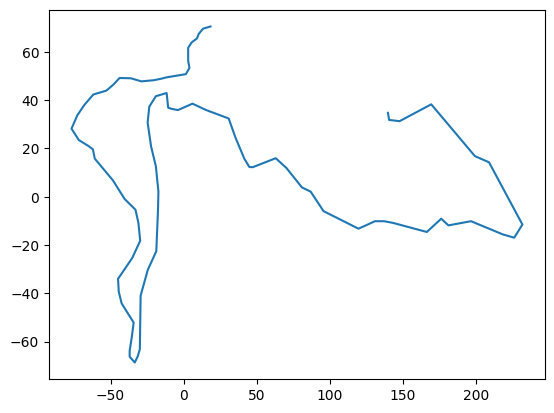

In [8]:
import gpxpy                                                                   
import matplotlib.pyplot as plt                                                
                                                                            
gpx_file = open('./nautilus_route.gpx', 'r')                                               
gpx = gpxpy.parse(gpx_file)                                                    
                                                                            
data = gpx.tracks[0].segments[0].points                                        
lon = [point.longitude for point in data]                                      
lat = [point.latitude for point in data]                                       
                                                                            
plt.plot(lon, lat)                                                             
plt.show()

In [20]:
from gpxplotter import read_gpx_file, create_folium_map, add_segment_to_map

# Define some properties for drawing the line:
line_options = {'color': 'red', 'weight': 8, 'opacity': 0.5}

the_map = create_folium_map(tiles='openstreetmap') # 'stamenterrain',  'openstreetmap'
for track in read_gpx_file('./nautilus_route.gpx'):
    for i, segment in enumerate(track['segments']):
        add_segment_to_map(the_map, segment, line_options=line_options, add_start_end=False)

# To store the map as a HTML page:
# the_map.save('map_000.html')

# To display the map in a Jupyter notebook:
the_map

In [65]:
import numpy as np
def convolution(img, kernel, padding=True):
    """ Performs convolution operation given an image and a kernel

        Parameters
        ----------
        img : array_like
        1-channel image
        kernel : array-like
        kernel (filter) for convolution
        
        Returns
        -------
        np.ndarray
        result of the convolution operation
    """
    result = np.zeros_like(img)
    p_size_i = kernel.shape[0] // 2
    p_size_j = kernel.shape[1] // 2
    
    if padding:
        padded_img = np.zeros((img.shape[0] + 2 * p_size_i, img.shape[1] + 2 * p_size_j))
        i_first = p_size_i
        i_last = padded_img.shape[0] - p_size_i - 1
        j_first = p_size_j
        j_last = padded_img.shape[1] - p_size_j - 1
        padded_img[i_first: i_last + 1, j_first: j_last + 1] = img
    else:
        padded_img = img.copy()
        i_first = p_size_i
        i_last = padded_img.shape[0] - p_size_i - 1
        j_first = p_size_j
        j_last = padded_img.shape[1] - p_size_j - 1
    
    for i in range(i_first, i_last):
        for j in range(j_first, j_last):
            window = padded_img[i - p_size_i: i + p_size_i + 1, j - p_size_j: j + p_size_j + 1]
            res_pix = np.sum(window * kernel)
            result[i - p_size_i, j - p_size_j] = res_pix
    return result


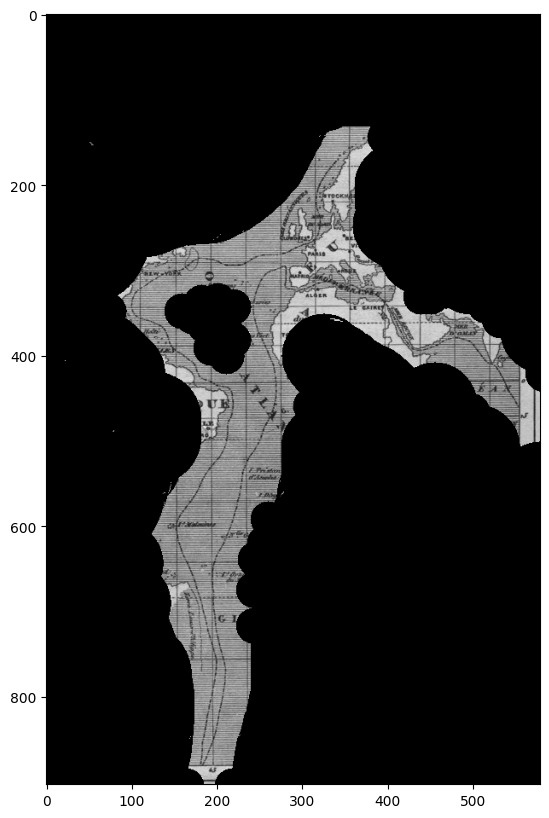

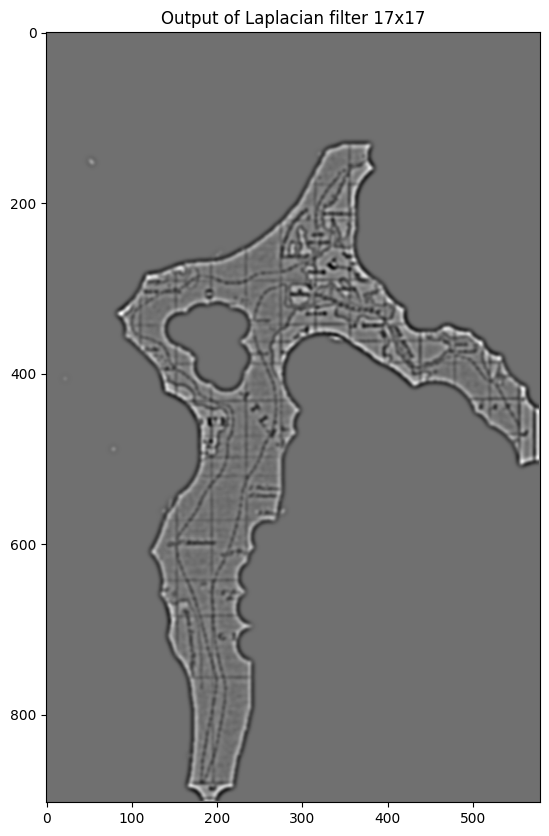

True

In [75]:

import cv2                                                                     
                                                                                
# Read the image                                                               
image = cv2.imread('./bg_2000.png')                                                
                                                                            
# Convert the image to grayscale                                               
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
figure = plt.figure(figsize=(10, 10))
plt.imshow(gray_image, cmap='gray')


gray_image = gray_image / 255
                                                                         
from scipy.io import loadmat
laplacian = np.array([[0, 1, 0],
                 [1, -4, 1],
                 [0, 1, 0]])
log5 = loadmat('./Log5.mat')['Log5']
log17 = loadmat('./Log17.mat')['Log17']

def apply_filter(img, log_kernel):
    kernel_size =log_kernel.shape[0]
    res = convolution(img, log_kernel, kernel_size)
    return res

log_res = apply_filter(gray_image, log17)

figure = plt.figure(figsize=(10, 10))
plt.imshow(log_res, cmap='gray')
plt.title('Output of Laplacian filter 17x17')
plt.show()
# save the image
cv2.imwrite('./20000_map_2edged.jpg', log_res * 255)